In [54]:
from google.colab import files
uploaded = files.upload()

Saving BlackFriday.csv to BlackFriday (1).csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fancyimpute
from sklearn.impute import SimpleImputer
import sklearn
import seaborn as sns
from sklearn.metrics import r2_score

In [57]:
inp = pd.read_csv('BlackFriday.csv')
print(inp.shape)

(537577, 12)


In [6]:
print(inp.isna().sum())
inp = inp.drop(columns = ['Product_Category_3'])
null_list = inp.columns[inp.isna().any()].tolist()
print(null_list)

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64
['Product_Category_2']


In [0]:
#mode imputation
for i in null_list:
     exec("inp.%s.fillna(inp.%s.value_counts().idxmax(),inplace=True)" %(i,i))

In [0]:
X = inp.copy()

In [0]:
product_id_res = X.groupby(["Product_ID"])["Purchase"].mean()
avg_cost = X["Purchase"].mean()
# If i find a product id for which i dont have an avg pricing i will use global vg pricing.
product_id_res_map = {}

In [11]:
val = product_id_res.iteritems()
for key, value in val:
    p_id = str(key)
    product_id_res_map[p_id] = value
print(product_id_res_map)

{'P00000142': 11143.507079646017, 'P00000242': 10552.293800539084, 'P00000342': 5299.928571428572, 'P00000442': 4795.358695652174, 'P00000542': 5419.308219178082, 'P00000642': 14913.23828125, 'P00000742': 6033.441176470588, 'P00000842': 10008.722222222223, 'P00000942': 10614.5, 'P00001042': 13739.238866396761, 'P00001142': 6681.475524475524, 'P00001242': 4255.828282828283, 'P00001342': 8498.688524590163, 'P00001442': 7383.481927710844, 'P00001542': 9243.911764705883, 'P00001642': 7570.851002865329, 'P00001742': 7985.144766146993, 'P00001842': 14420.315789473685, 'P00001942': 4314.588516746411, 'P00002042': 9604.978021978022, 'P00002142': 14179.868131868132, 'P00002242': 13526.774358974359, 'P00002342': 11884.121212121212, 'P00002442': 6375.618461538462, 'P00002542': 7314.695488721804, 'P00002642': 6865.741935483871, 'P00002742': 6017.538461538462, 'P00002842': 14896.77108433735, 'P00002942': 13153.077625570777, 'P00003042': 7529.648648648648, 'P00003142': 6137.712643678161, 'P00003242'

In [0]:
def get_purchase_mean(product_id, product_category=None, key=None):
    key_pair = str(product_id)
#     key_pair_pid = str(product_id) + str(product_category)
#     if key == "1":
#         if key_pair_pid in product_category_1_res:
#             return product_category_1_res[key_pair_pid]
#     elif key == "2":
#         if key_pair_pid in product_category_2_res:
#             return product_category_2_res[key_pair_pid]
#     elif key == "3":
#         if key_pair_pid in product_category_3_res:
#             return product_category_3_res[key_pair_pid]
    if key_pair in product_id_res_map:
        return product_id_res_map[key_pair]
    
    return avg_cost

In [0]:
ser = pd.Series(list(map(lambda product_id: get_purchase_mean(product_id), X["Product_ID"])))

In [0]:
X["Mean_pid"]=ser 

In [0]:
X["user_cum_sum"]= X.groupby(['User_ID'])['Purchase'].apply(lambda x: x.cumsum())

In [16]:
X.shape

(537577, 13)

In [0]:
user_count_dict ={}
cum_avg = list()

In [0]:
for index,row in X.iterrows():
  if(row['User_ID']) in user_count_dict :
    user_count_dict[row['User_ID']] +=1
  else :
    user_count_dict[row['User_ID']] = 1
  
  p = row['user_cum_sum'] / user_count_dict[row['User_ID']]
  cum_avg.append(p)
  

  
    

In [0]:
cum_avg = pd.Series(cum_avg)

In [0]:
X['User_cum_avg'] = cum_avg

In [0]:
Y = X["Purchase"]

In [0]:
X_inp = X.drop(columns=["User_ID","Product_ID","user_cum_sum","Purchase"])
se1 = X["Mean_pid"]
se2 = X["User_cum_avg"]
Y_inp = X["Purchase"]
X_inp_copy = X_inp.drop(columns=["Mean_pid",	"User_cum_avg"])


In [0]:
gender_dict = {'F':0, 'M':1}
age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
city_dict = {'A':0, 'B':1, 'C':2}
stay_dict = {'0':0, '1':1, '2':2, '3':3, '4+':4}

X_inp_copy["Gender"] = X_inp_copy["Gender"].apply(lambda x: gender_dict[x])
X_inp_copy["Age"] = X_inp_copy["Age"].apply(lambda x: age_dict[x])
X_inp_copy["City_Category"] = X_inp_copy["City_Category"].apply(lambda x: city_dict[x])
X_inp_copy["Stay_In_Current_City_Years"] = X_inp_copy["Stay_In_Current_City_Years"].apply(lambda x: stay_dict[x])

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

LE = LabelEncoder()
X_inp_copy = X_inp_copy.apply(LE.fit_transform)

In [0]:
X_inp_copy["Mean_pid"] = se1
X_inp_copy["User_cum_avg"] = se2

In [26]:
SS = StandardScaler()

#scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = SS.fit_transform(X_inp_copy)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


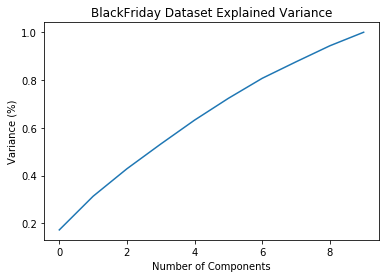

In [27]:
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('BlackFriday Dataset Explained Variance')
plt.show()

pca = PCA(n_components=8)
pca1 = PCA(n_components=8).fit(data_rescaled)
dataset = pca.fit_transform(data_rescaled)

In [0]:
from sklearn.model_selection import KFold
kf = KFold(10)

#Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).
#Each fold is then used once as a validation while the k - 1 remaining folds form the training set.
for a,b in kf.split(dataset):
    X_train, X_test = data_rescaled[a],data_rescaled[b]
    y_train, y_test = Y[a],Y[b]
    #print(X_test.shape)
    #print(a)
    #print(b)


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


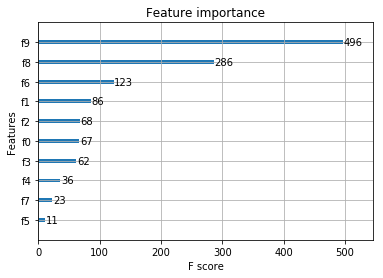

In [29]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = 0.3,
                max_depth = 7, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 15]
plt.show()

In [30]:
print(X_inp_copy.columns.values)

['Gender' 'Age' 'Occupation' 'City_Category' 'Stay_In_Current_City_Years'
 'Marital_Status' 'Product_Category_1' 'Product_Category_2' 'Mean_pid'
 'User_cum_avg']


In [31]:
new_X = X_inp_copy.copy()
new_X = new_X.drop(columns=['Gender','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Age','Product_Category_2'])
new_X.head(5)

,Product_Category_1,Mean_pid,User_cum_avg
0,2,11863.760181,8370.000000
1,0,16293.307018,11785.000000
2,11,1240.323232,8330.666667
3,11,1455.062874,6512.250000
4,7,7718.695000,7969.000000


In [0]:
#HyperParameter Tuning for Gradient Boosting
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[250,500,1000],'learning_rate':[0.1],'max_depth':[2,4,6],'random_state':[1]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=20)

In [33]:
new_data_rescaled = SS.fit_transform(new_X)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_rmse = []

for a,b in kf.split(dataset):
    new_X_train, new_X_test = new_data_rescaled[a],new_data_rescaled[b]
    new_y_train, new_y_test = Y[a],Y[b]
    new_gbr = GradientBoostingRegressor(max_depth=6,learning_rate=0.1,n_estimators=1000)
    new_fit_gbr = new_gbr.fit(new_X_train,new_y_train)
    new_gb_predict = new_fit_gbr.predict(new_X_test)
    new_gb_msr = mean_squared_error(new_gb_predict,new_y_test)
    
    gbr_rmse.append(np.sqrt(new_gb_msr))
    
    print(np.sqrt(new_gb_msr))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


2423.142886733501
2520.8606346044908
2533.660978359978
2517.889849160005
2546.3101707422197
2535.903196242965
2551.544362951391
2565.5406260123173
2542.4068830906663
2582.222167598607


In [0]:
#RANDOM FOREST HYPERPARAMETER
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30],
    'max_features': [2, 3],
    'min_samples_leaf': [50, 80]
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

537577

In [0]:
from sklearn.ensemble import RandomForestRegressor

rf_rmse = []
new_data_rescaled = SS.fit_transform(new_X)
for a,b in kf.split(dataset):
    new_X_train, new_X_test = new_data_rescaled[a],new_data_rescaled[b]
    new_y_train, new_y_test = Y[a],Y[b]
    new_rf = RandomForestRegressor(max_depth = 30, max_features="auto",min_samples_leaf=80,min_samples_split=8,n_estimators=1000,n_jobs=1)
    new_fit_rf = new_rf.fit(new_X_train,new_y_train)
    new_rf_predict = new_fit_rf.predict(new_X_test)
    new_rf_msr = mean_squared_error(new_rf_predict,new_y_test)
    
    rf_train_predict = new_fit_rf.predict(new_X_train)
    
    rf_rmse.append(np.sqrt(new_rf_msr))
    
    print("finished")

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


finished
finished


In [0]:

xgb_rmse = []
new_data_rescaled = SS.fit_transform(new_X)
for a,b in kf.split(dataset):
    new_X_train, new_X_test = new_data_rescaled[a],new_data_rescaled[b]
    new_y_train, new_y_test = Y[a],Y[b]
    new_xgb =xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = 0.1,
                max_depth = 8, n_estimators = 1000)
    new_fit_xgb = new_xgb.fit(new_X_train,new_y_train)
    new_xgb_predict = new_fit_xgb.predict(new_X_test)
    new_xgb_msr = mean_squared_error(new_xgb_predict,new_y_test)
    
    
    
    xgb_rmse.append(np.sqrt(new_xgb_msr))
    
    print("finished")

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from keras import backend as K

nn_rmse=[]
for a,b in kf.split(dataset):
    new_X_train, new_X_test = new_data_rescaled[a],new_data_rescaled[b]
    new_y_train, new_y_test = Y[a],Y[b]
    model = Sequential()
    model.add(Dense(32,input_dim=3,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dense(18, kernel_initializer = 'normal',activation='relu'))
    model.add(Dense(1,kernel_initializer = 'normal'))
    model.compile(loss='mean_squared_error',optimizer ='adam')
    history = model.fit(new_X_train, new_y_train, batch_size=32, epochs=10, verbose=1, validation_split=.2)
    new_predictor = model.predict(new_X_test)
    nn_ms = mean_squared_error(new_predictor,new_y_test)
    nn_rmse.append(np.sqrt(nn_ms))




In [0]:
for a,b in kf.split(dataset):
    new_X_train, new_X_test = new_data_rescaled[a],new_data_rescaled[b]
    new_y_train, new_y_test = Y[a],Y[b]
    

In [0]:
gbr_oof_train = []
rf_oof_train = []
xgb_oof_train = []
nn_oof_train = []


gbr_oof_test = []
rf_oof_test = []
xgb_oof_test = []
nn_oof_test = []

In [0]:
def plot_reg(y_test,pred):
  plt.rc('xtick', labelsize=30) 
  plt.rc('ytick', labelsize=30) 
  fig, ax = plt.subplots(figsize=(8, 6))
  plt.style.use('ggplot')
  plt.plot(pred, y_test, 'ro')
  plt.xlabel('Predicted Price', fontsize = 30)
  plt.ylabel('Actual Price', fontsize = 30)
  plt.title('Predicted Price to the Actual Price', fontsize = 30)
  ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
  plt.show()

6666453.2833167445


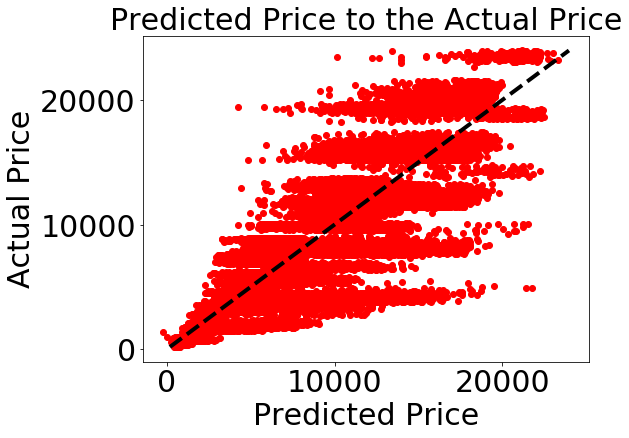

In [39]:
# Gradient Boost Predictions
from sklearn.ensemble import GradientBoostingRegressor

new_gbr = GradientBoostingRegressor(max_depth=6,learning_rate=0.1,n_estimators=1000)
new_fit_gbr = new_gbr.fit(new_X_train,new_y_train)
gbr_predict_test = new_fit_gbr.predict(new_X_test)
gbr_predict_train = new_fit_gbr.predict(new_X_train)


gbr_rmse1= mean_squared_error(gbr_predict_test,new_y_test)

plot_reg(new_y_test,gbr_predict_test)

In [0]:
for i in gbr_predict_test:
  gbr_oof_test.append(i)
  
for i in gbr_predict_train:
  gbr_oof_train.append(i)
 

In [40]:
print(np.sqrt(gbr_rmse1))

2581.947575632926


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


2588.819281413185


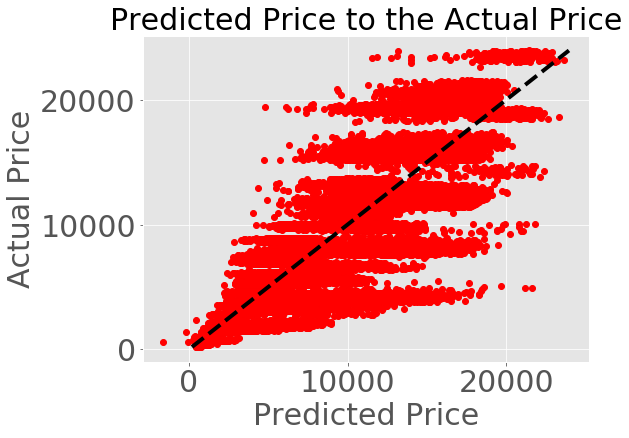

In [42]:
#XGBoost Predictions

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = 0.1,
                max_depth = 8, n_estimators = 1000)
xg_reg.fit(new_X_train,new_y_train)

xgb_predict_test = xg_reg.predict(new_X_test)
xgb_predict_train = xg_reg.predict(new_X_train)



xgb_rmse1= mean_squared_error(xgb_predict_test,new_y_test)
print(np.sqrt(xgb_rmse1))
plot_reg(new_y_test,xgb_predict_test)

In [0]:
for i in xgb_predict_test:
  xgb_oof_test.append(i)
  
for i in xgb_predict_train:
  xgb_oof_train.append(i)

In [0]:
# Random forest predictions
from sklearn.ensemble import RandomForestRegressor
new_rfr = RandomForestRegressor(max_depth = 30, max_features="auto",min_samples_leaf=80,min_samples_split=8,n_estimators=1000,n_jobs=1)
new_fit_rfr = new_rfr.fit(new_X_train,new_y_train)
rf_predict_test = new_fit_rfr.predict(new_X_test)
rf_prdict_train = new_fit_rfr.predict(new_X_train)

for i in rf_predict_test:
  rf_oof_test.append(i)
  

 


2581.0858411937643


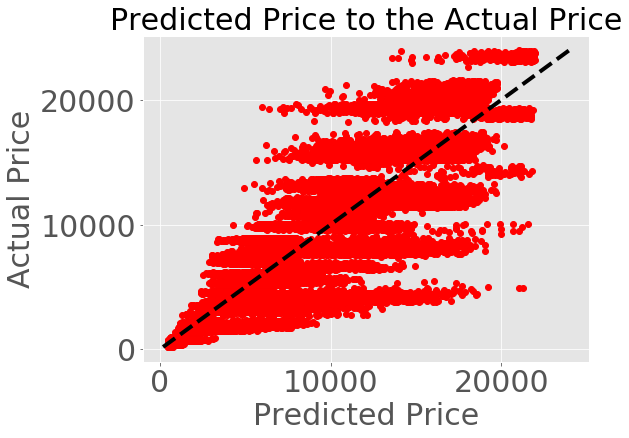

In [64]:
for i in rf_prdict_train:
  rf_oof_train.append(i)
  
rf_rmse1= mean_squared_error(rf_predict_test,new_y_test)
print(np.sqrt(rf_rmse1))
plot_reg(new_y_test,rf_predict_test)

In [59]:
#MLP predictions
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from keras import backend as K

model = Sequential()
model.add(Dense(32,input_dim=3,kernel_initializer = 'normal',activation = 'relu'))
model.add(Dense(18, kernel_initializer = 'normal',activation='relu'))
#model.add(Dense(6, kernel_initializer = 'normal',activation='relu'))
model.add(Dense(1,kernel_initializer = 'normal'))
model.compile(loss='mean_squared_error',optimizer ='adam')
history = model.fit(new_X_train, new_y_train, batch_size=32, epochs=10, verbose=1, validation_split=.2)



nn_predict_test = model.predict(new_X_test)
nn_predict_train = model.predict(new_X_train)

nn_predict_test = [item for sublist in nn_predict_test for item in sublist]
nn_predict_train = [item for sublist in nn_predict_train for item in sublist]



Train on 387056 samples, validate on 96764 samples
Epoch 1/20
387056/387056 [==============================] - 14s 37us/step - loss: 15491324.8016 - val_loss: 6643594.9278
Epoch 2/20
387056/387056 [==============================] - 13s 35us/step - loss: 6476094.2017 - val_loss: 6641763.3964
Epoch 3/20
387056/387056 [==============================] - 14s 35us/step - loss: 6468698.0178 - val_loss: 6631423.3751
Epoch 4/20
387056/387056 [==============================] - 14s 36us/step - loss: 6466360.6600 - val_loss: 6641083.1002
Epoch 5/20
387056/387056 [==============================] - 14s 35us/step - loss: 6465562.5310 - val_loss: 6618716.4764
Epoch 6/20
387056/387056 [==============================] - 14s 36us/step - loss: 6465244.3827 - val_loss: 6629576.7660
Epoch 7/20
387056/387056 [==============================] - 14s 36us/step - loss: 6462591.2768 - val_loss: 6632941.9719
Epoch 8/20
387056/387056 [==============================] - 14s 35us/step - loss: 6460483.2420 - val_loss: 6

TypeError: ignored

2581.22732190033


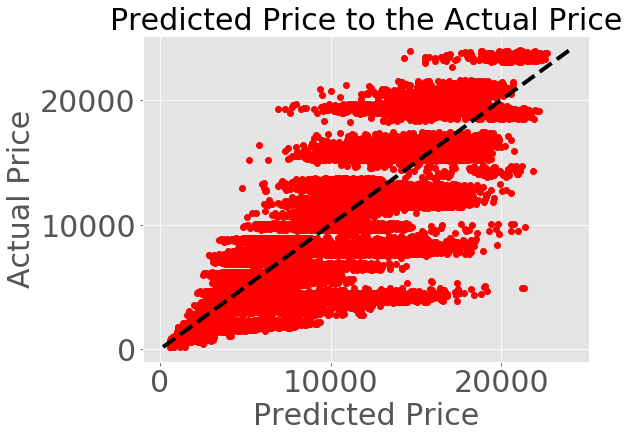

In [61]:
for i in nn_predict_test:
  nn_oof_test.append(i)
  
for i in nn_predict_train:
  nn_oof_train.append(i)

nn_rmse1= mean_squared_error(nn_predict_test,new_y_test)
print(np.sqrt(nn_rmse1))
  
plot_reg(new_y_test,nn_predict_test)

In [0]:
nn_oof_train=pd.Series(nn_oof_train)
gbr_oof_train=pd.Series(gbr_oof_train)
rf_oof_train=pd.Series(rf_oof_train)
xgb_oof_train=pd.Series(xgb_oof_train)

nn_oof_test=pd.Series(nn_oof_test)
gbr_oof_test=pd.Series(gbr_oof_test)
xgb_oof_test=pd.Series(xgb_oof_test)
rf_oof_test=pd.Series(rf_oof_test)

In [0]:
level_2_train = pd.concat([gbr_oof_train,xgb_oof_train,rf_oof_train,nn_oof_train],axis =1)
level_2_test = pd.concat([gbr_oof_test,xgb_oof_test,rf_oof_test,nn_oof_test],axis =1)


In [69]:
#Stacked Ensembling

#NON-NEGATIVE WEIGHT REGULARIZATION

level_2_train = SS.fit_transform(level_2_train)
level_2_test = SS.fit_transform(level_2_test)

from sklearn.linear_model import Lasso

lin = Lasso(alpha=0.0001,precompute=True,max_iter=1000,
            positive=True, random_state=9999, selection='random')
se1 = lin.fit(level_2_train,new_y_train)
se1_predict = se1.predict(level_2_test)
    
se1_ms = mean_squared_error(se1_predict,new_y_test)
print(np.sqrt(se1_ms))



2591.6209370686156


In [3]:
#XGBoost

xg_reg_1 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = 0.1,
                max_depth = 20, n_estimators = 1000)
xg_reg_1.fit(level_2_train,new_y_train)

preds = xg_reg_1.predict(level_2_test)
rmse = np.sqrt(mean_squared_error(new_y_test, preds))
print("RMSE: %f" % (rmse))

2600.456459020113497
